## Unemployment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
unemp = pd.read_csv("c:/Users/Vaidhehi/OneDrive/Documents/Unemployment in India.csv")

In [9]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [10]:
unemp.sample(5)

Region         Date  Frequency  \
29             Bihar   31-08-2019    Monthly   
667           Sikkim   30-04-2020    Monthly   
222           Odisha   31-10-2019    Monthly   
131  Jammu & Kashmir   31-05-2020    Monthly   
146        Jharkhand   30-06-2020    Monthly   

      Estimated Unemployment Rate (%)   Estimated Employed  \
29                              11.00           22260203.0   
667                              5.77              81905.0   
222                              4.28           11621534.0   
131                              2.22            2716966.0   
146                             21.53            6375114.0   

      Estimated Labour Participation Rate (%)   Area  
29                                      36.85  Rural  
667                                     40.31  Urban  
222                                     41.88  Rural  
131                                     38.46  Rural  
146                                     40.65  Rural

In [11]:
unemp.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [12]:
unemp.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                                   72.570000

In [13]:
unemp['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [14]:
unemp['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [15]:
unemp[' Date'].value_counts()

 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

In [16]:
unemp[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [17]:
unemp[' Estimated Employed'].corr(unemp[' Estimated Unemployment Rate (%)'])

-0.22287639952214786

In [18]:
df2 = unemp.dropna().drop(columns=[' Frequency'])

df2

Region         Date   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019                              3.65   
1    Andhra Pradesh   30-06-2019                              3.05   
2    Andhra Pradesh   31-07-2019                              3.75   
3    Andhra Pradesh   31-08-2019                              3.32   
4    Andhra Pradesh   30-09-2019                              5.17   
..              ...          ...                               ...   
749     West Bengal   29-02-2020                              7.55   
750     West Bengal   31-03-2020                              6.67   
751     West Bengal   30-04-2020                             15.63   
752     West Bengal   31-05-2020                             15.22   
753     West Bengal   30-06-2020                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
749           10871168.0                                     44.09  Urban  
750           10806105.0                                     43.34  Urban  
751            9299466.0                                     41.20  Urban  
752            9240903.0                                     40.67  Urban  
753            9088931.0                                     37.57  Urban  

[740 rows x 6 columns]

In [19]:
df3 = df2.rename(columns={"Region" : "region", ' Date' : 'date', ' Estimated Unemployment Rate (%)' : 'est_unemp_perc', ' Estimated Employed' : 'est_mil_emp',
                          ' Estimated Labour Participation Rate (%)' : 'est_labour_perc', 'Area' : 'area'}).reset_index(drop = True)
df3['est_mil_emp'] = (df3['est_mil_emp'] / 1000000).round(2)
df3

region         date  est_unemp_perc  est_mil_emp  \
0    Andhra Pradesh   31-05-2019            3.65        12.00   
1    Andhra Pradesh   30-06-2019            3.05        11.76   
2    Andhra Pradesh   31-07-2019            3.75        12.09   
3    Andhra Pradesh   31-08-2019            3.32        12.29   
4    Andhra Pradesh   30-09-2019            5.17        12.26   
..              ...          ...             ...          ...   
735     West Bengal   29-02-2020            7.55        10.87   
736     West Bengal   31-03-2020            6.67        10.81   
737     West Bengal   30-04-2020           15.63         9.30   
738     West Bengal   31-05-2020           15.22         9.24   
739     West Bengal   30-06-2020            9.86         9.09   

     est_labour_perc   area  
0              43.24  Rural  
1              42.05  Rural  
2              43.50  Rural  
3              43.97  Rural  
4              44.68  Rural  
..               ...    ...  
735            44.09  Urban  
736            43.34  Urban  
737            41.20  Urban  
738            40.67  Urban  
739            37.57  Urban  

[740 rows x 6 columns]

In [20]:
df3.duplicated().sum()

0

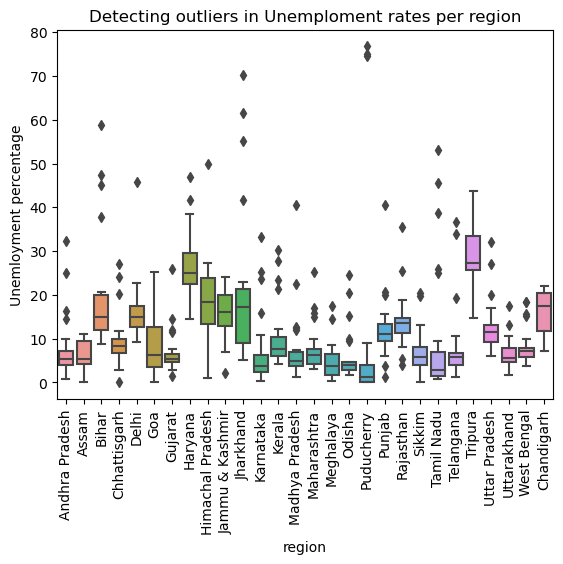

In [21]:
sns.boxplot(data= df3, x='region', y='est_unemp_perc')
plt.title('Detecting outliers in Unemploment rates per region')
plt.ylabel('Unemloyment percentage')
plt.xticks(rotation = 90)
plt.show()


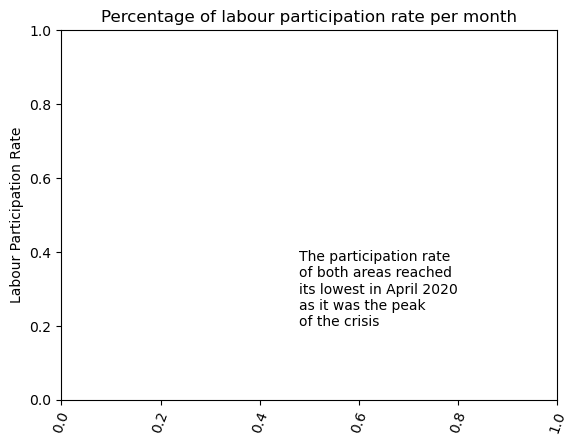

In [33]:

plt.title('Percentage of labour participation rate per month')
plt.ylabel('Labour Participation Rate')
plt.xticks(rotation=70)
plt.text(0.48, 0.2, 'The participation rate\nof both areas reached\nits lowest in April 2020\nas it was the peak\nof the crisis')

plt.show()

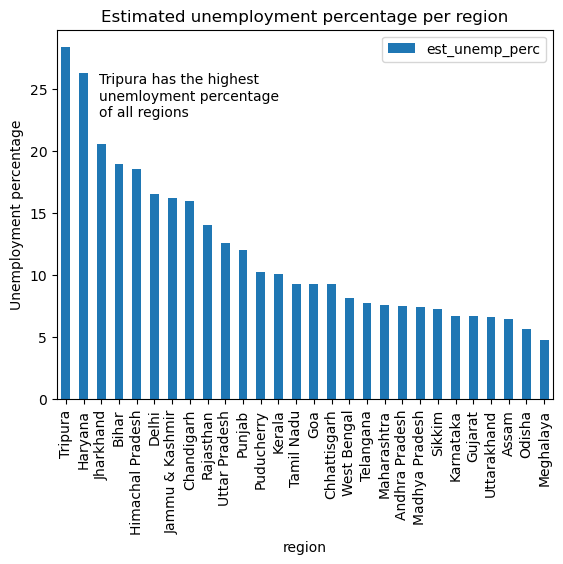

In [24]:
df5 = df3.groupby('region')[['est_unemp_perc']].mean().sort_values(by='est_unemp_perc',ascending= False)
df5.plot(kind='bar')
plt.title('Estimated unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.xticks(rotation= 90)
plt.figtext(x= 0.19, y= 0.7, s= 'Tripura has the highest\nunemloyment percentage\nof all regions')
plt.show()


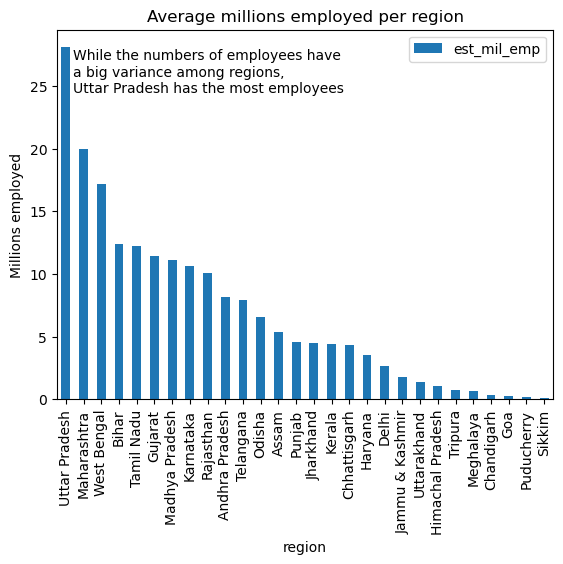

In [25]:
df4 = df3.groupby('region')[['est_mil_emp']].mean().sort_values(by='est_mil_emp',ascending= False)
df4.plot(kind='bar')
plt.title('Average millions employed per region')
plt.ylabel('Millions employed')
plt.figtext(x=0.15, y=0.75, s='While the numbers of employees have\na big variance among regions,\nUttar Pradesh has the most employees')
plt.show()

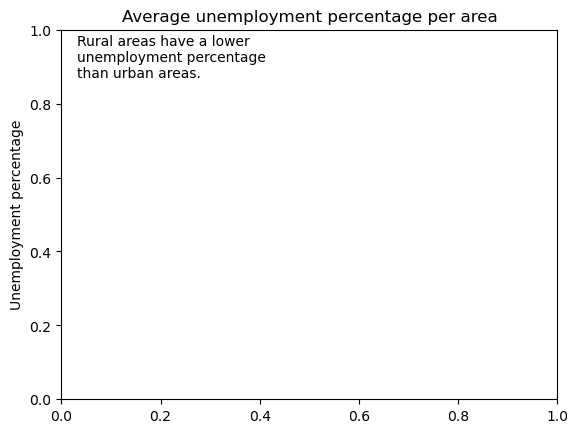

In [34]:
plt.figtext(x=0.15, y=0.78, s='Rural areas have a lower\nunemployment percentage\nthan urban areas.')
plt.title("Average unemployment percentage per area")
plt.ylabel('Unemployment percentage')
plt.xticks(rotation=0)  

plt.show()

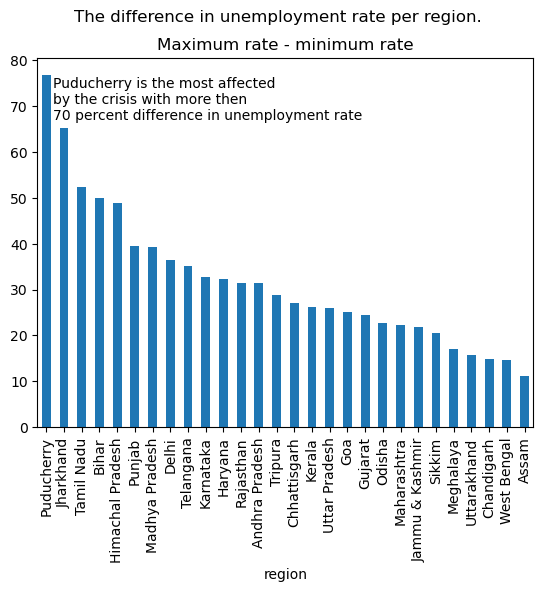

In [27]:
ax= df3.groupby('region')['est_unemp_perc'].agg(lambda x: max(x) - min(x)).sort_values(ascending=False).plot(kind='bar')
plt.suptitle('The difference in unemployment rate per region.')
plt.title('Maximum rate - minimum rate')
plt.figtext(x= 0.15, y= 0.75, s='Puducherry is the most affected\nby the crisis with more then\n70 percent difference in unemployment rate ')
plt.show()


## Car Price Prediction in ML

In [74]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math


In [36]:
data=pd.read_csv("C:/Users/Vaidhehi/OneDrive/Documents/car data.csv")
data.head()

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0

In [37]:
data.shape

(301, 9)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [39]:
data.describe().style.background_gradient(cmap='winter')

In [40]:
corr=data.corr().style.background_gradient(cmap='gray')
corr

<AxesSubplot:>

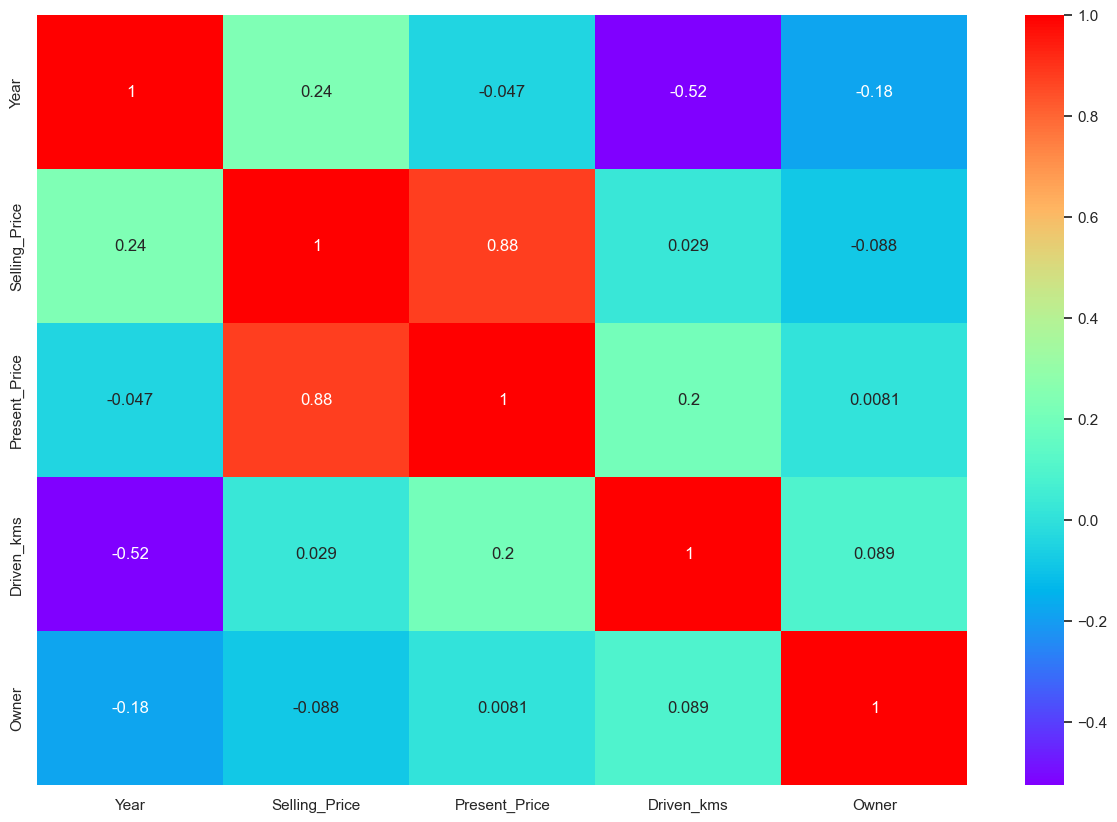

In [41]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

In [42]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

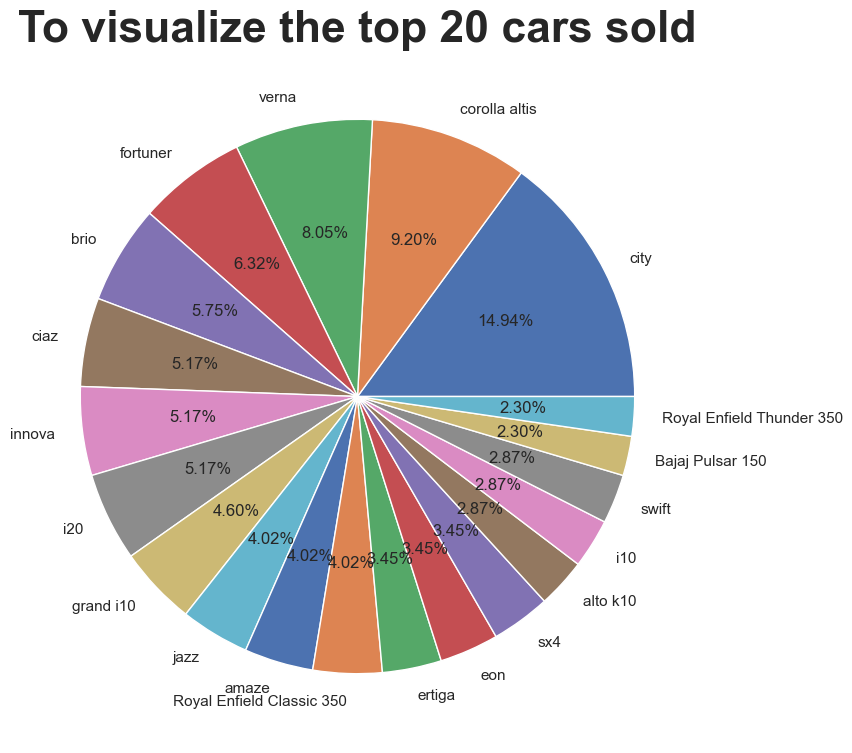

In [43]:
car_names=data['Car_Name'].value_counts()

label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(16,9))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title("To visualize the top 20 cars sold",fontsize=32,fontweight='bold')
plt.show()

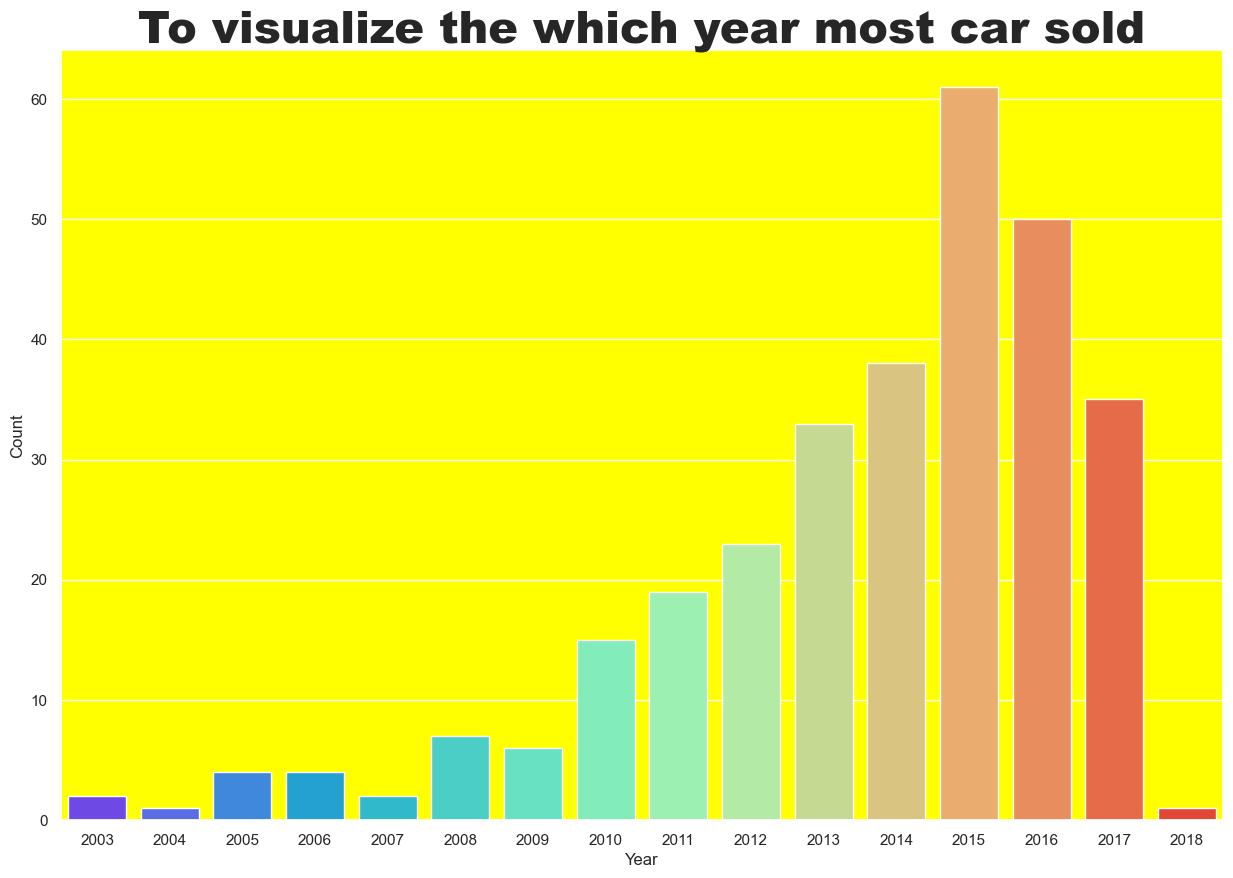

In [44]:
year=data['Year'].value_counts()

ax=plt.axes()

ax.set(facecolor='yellow')

sns.set(rc={'figure.figsize':(16,8)},style='darkgrid')

ax.set_title("To visualize the which year most car sold",fontsize=32,fontweight=900)

sns.barplot(x=year.index,y=year,palette='rainbow')

plt.xlabel("Year")

plt.ylabel("Count")

plt.show()

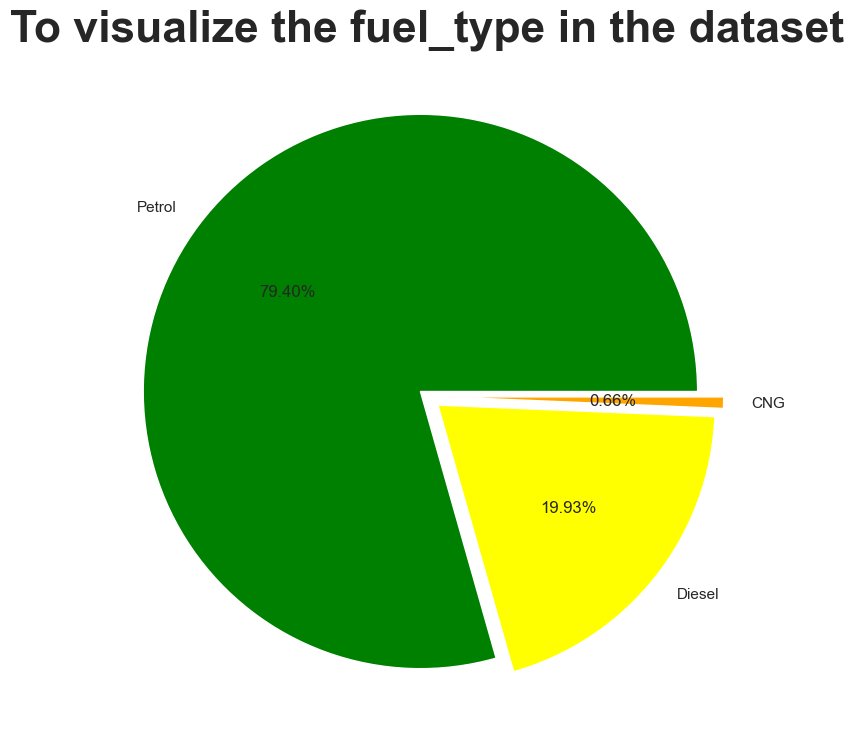

In [45]:
fuel_type=data['Fuel_Type'].value_counts()

label=['Petrol','Diesel','CNG']
plt.figure(figsize=(16,9))
plt.pie(fuel_type,labels=label, autopct='%1.2f%%',explode=[0.03,0.05,0.07],colors=['green','yellow','orange'])
plt.title("To visualize the fuel_type in the dataset",fontsize=32,fontweight='bold')
plt.show()

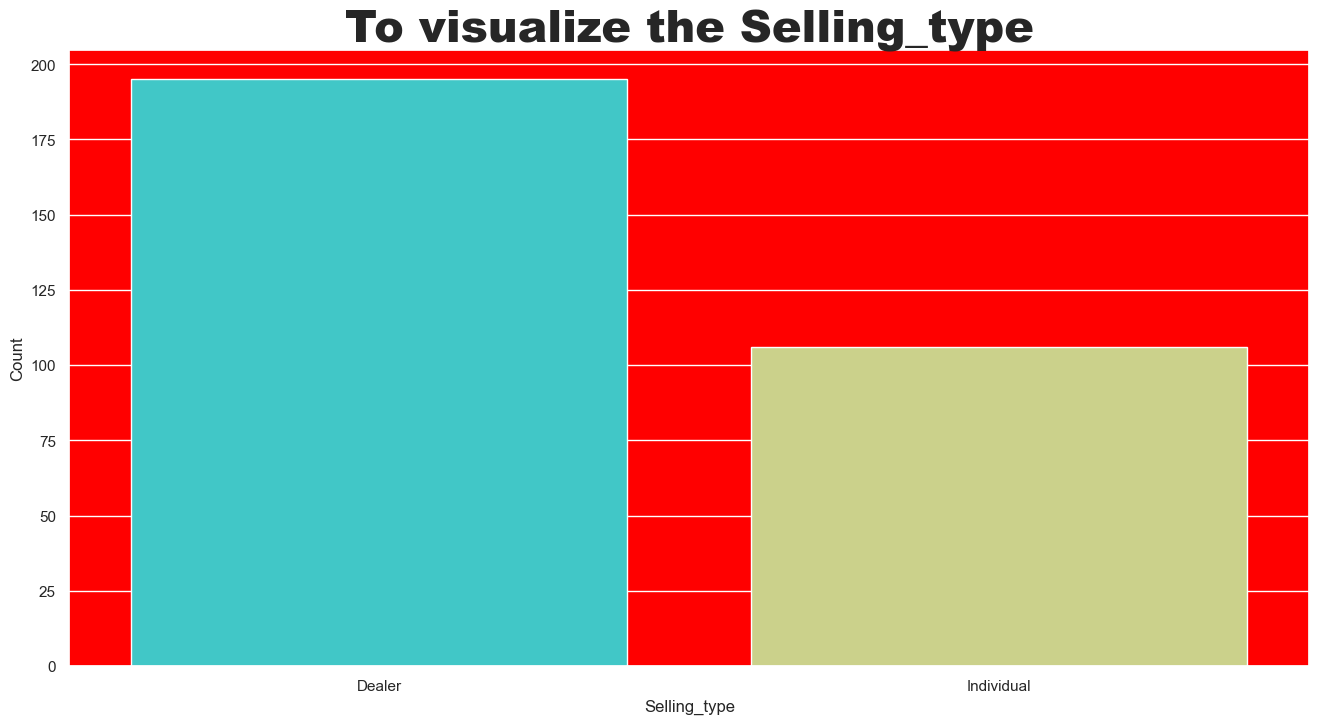

In [46]:

ax=plt.axes()

ax.set(facecolor='red')

sns.set(rc={'figure.figsize':(8,6)},style='darkgrid')

ax.set_title("To visualize the Selling_type",fontsize=32,fontweight=900)

sns.countplot(data['Selling_type'],palette='rainbow')

plt.xlabel("Selling_type")

plt.ylabel("Count")

plt.show()

<AxesSubplot:xlabel='Selling_Price'>

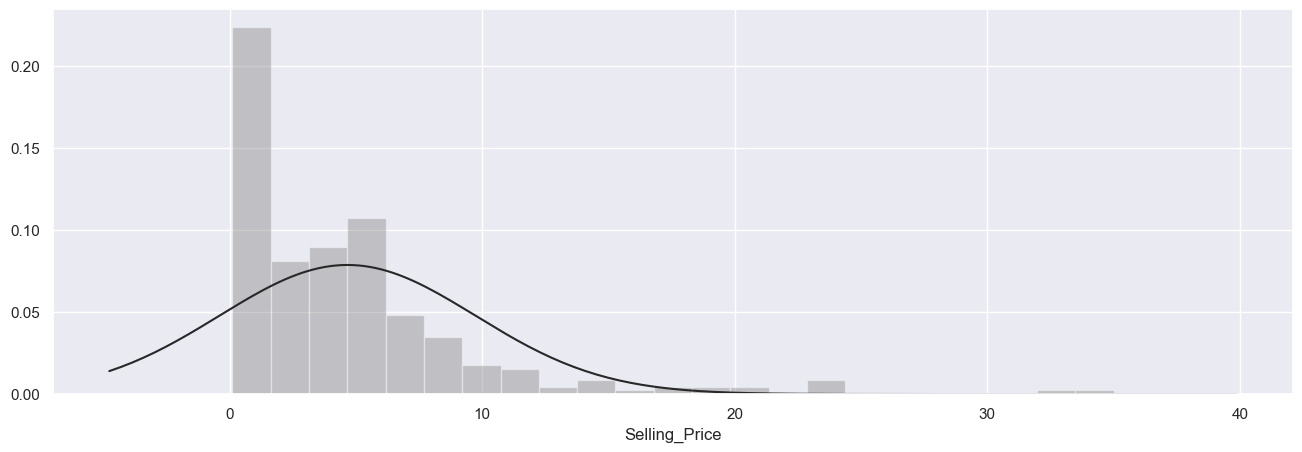

In [47]:
from scipy.stats import norm

sns.set(rc={'figure.figsize':(16,5)})

sns.distplot(data['Selling_Price'],fit=norm,kde=False,color='gray')

<AxesSubplot:xlabel='Present_Price'>

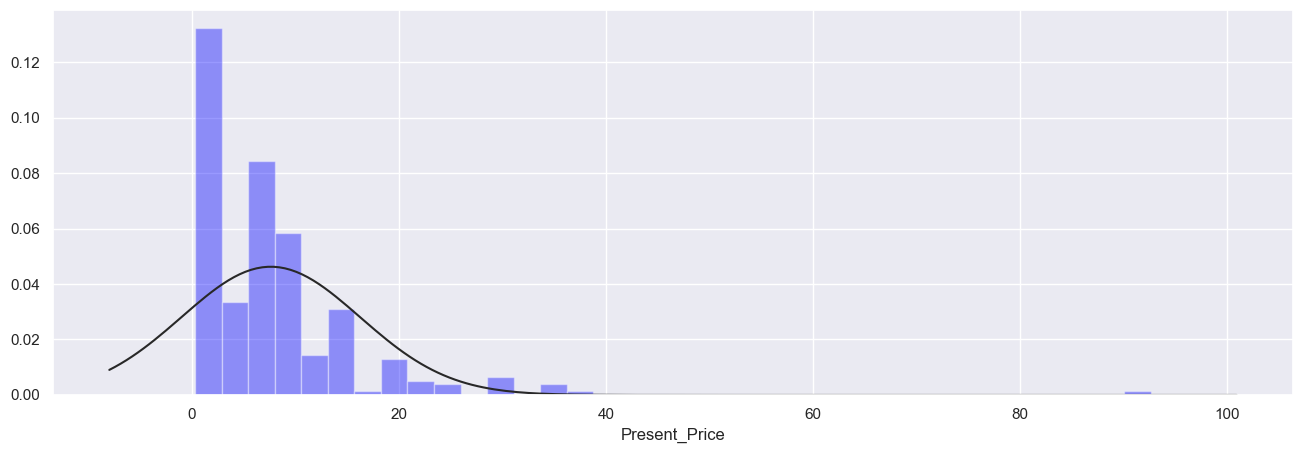

In [48]:
sns.set(rc={'figure.figsize':(16,5)})

sns.distplot(data['Present_Price'],fit=norm,kde=False,color='blue')

In [49]:
car_selling_price=data[['Car_Name','Selling_Price']].groupby(['Car_Name','Selling_Price']).sum().reset_index().sort_values(by='Selling_Price',ascending=False)
import plotly.express as px
fig=px.histogram(car_selling_price,x='Car_Name',y='Selling_Price',title="To visualize the car model with selling price")
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='black')

fig.show()


In [50]:
fig=px.scatter(data,y='Selling_Price',x='Present_Price')
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='yellow')
fig.show()

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

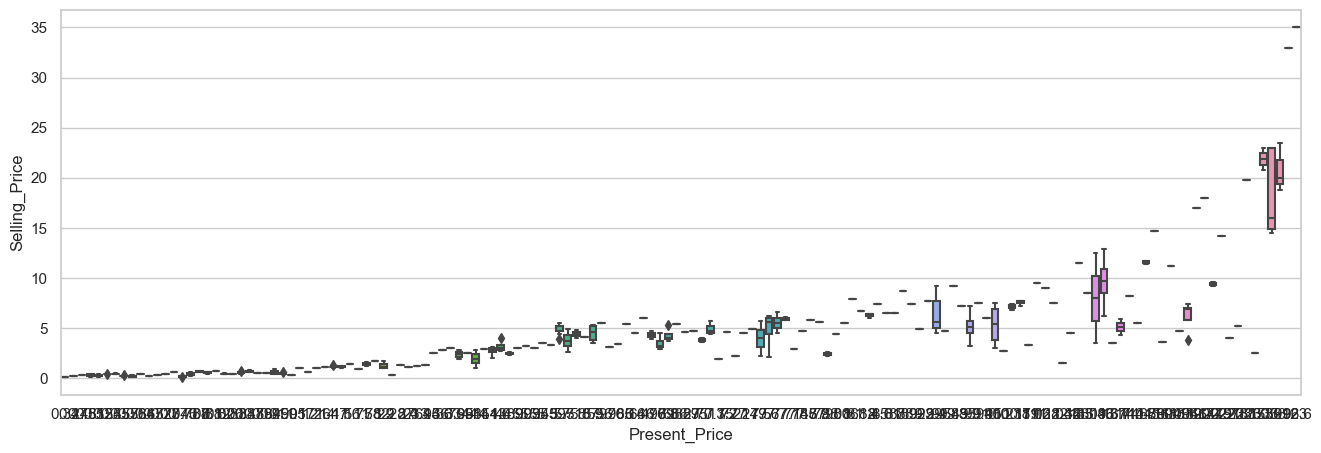

In [51]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Present_Price', y = 'Selling_Price', data = data)

<AxesSubplot:xlabel='Car_Name', ylabel='Selling_Price'>

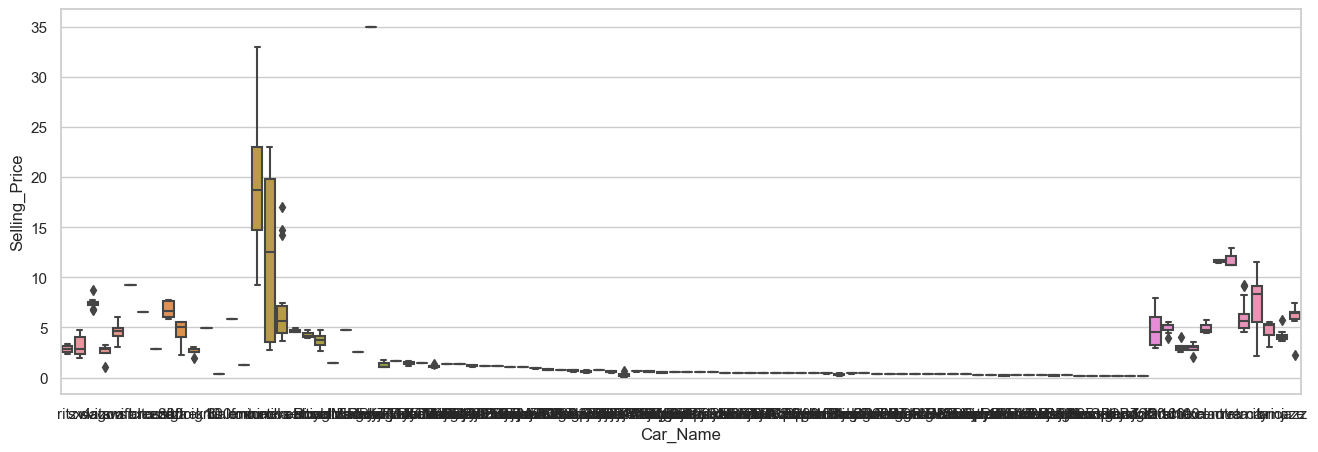

In [52]:
sns.set_style("whitegrid")
sns.boxplot(x ='Car_Name',y ='Selling_Price', data = data)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

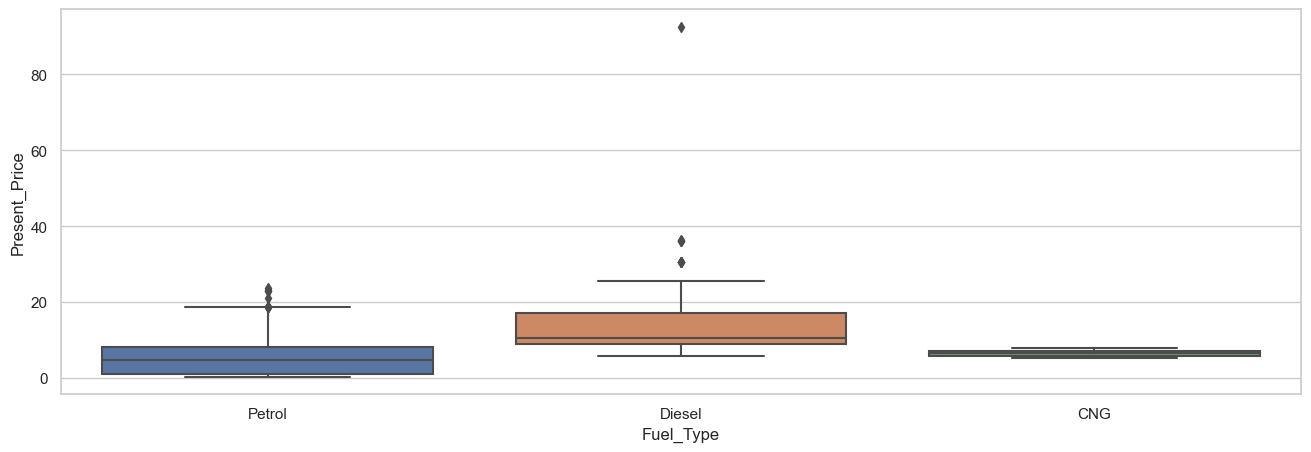

In [53]:
sns.set_style("whitegrid")
sns.boxplot(y = 'Present_Price', x = 'Fuel_Type', data = data)

<AxesSubplot:xlabel='Selling_type', ylabel='Present_Price'>

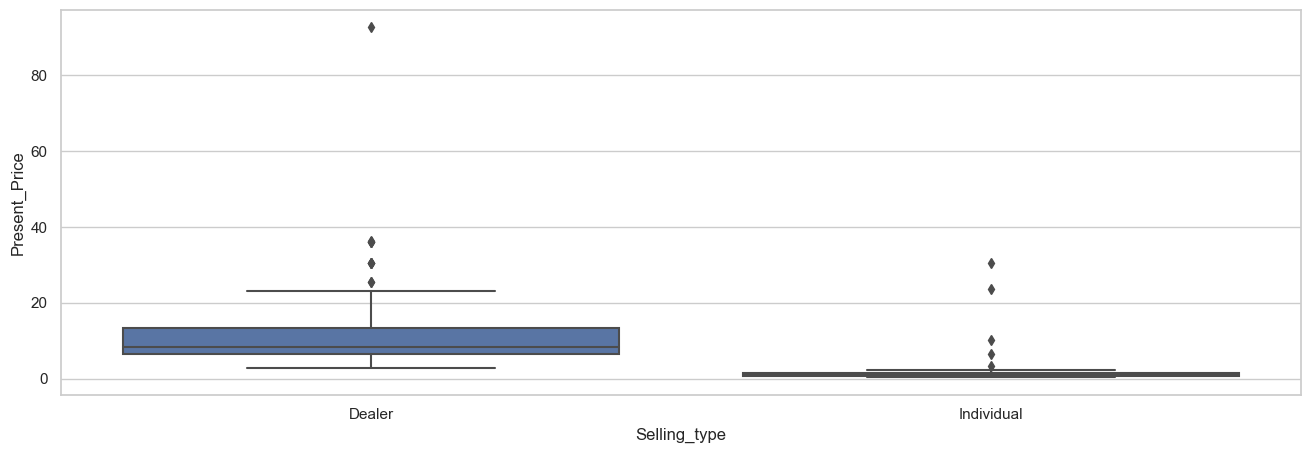

In [54]:
sns.set_style("whitegrid")
sns.boxplot(y ='Present_Price', x = 'Selling_type', data = data)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

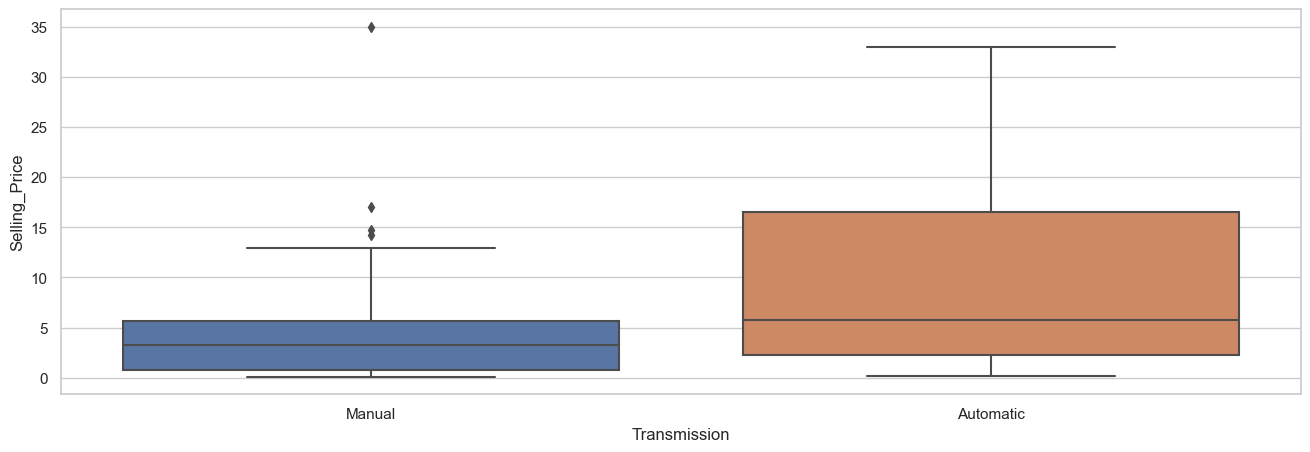

In [55]:
sns.set_style("whitegrid")
sns.boxplot(y ='Selling_Price', x = 'Transmission', data = data)

In [56]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
data['Car_Name']=label.fit_transform(data['Car_Name'])
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Selling_type']=label.fit_transform(data['Selling_type'])
data['Transmission']=label.fit_transform(data['Transmission'])

In [57]:
X=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

In [58]:
scaler=StandardScaler()

X=scaler.fit_transform(X)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [60]:
linear=LinearRegression()

linear.fit(X_train,y_train)

linear_pred=linear.predict(X_test)

In [61]:
print(f'The Test_accuracy: {linear.score(X_test,y_test)*100:.2f}')

print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 87.50
The Train_accuracy: 87.75


In [62]:
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LinearRegression {:.4f}".format(rmse))
print("R2_score LinearRegression {:4f}".format(r2_score(y_test,linear_pred)))
print("mean_absolute_error LinearRegression {:4f}".format(mean_absolute_error(y_test,linear_pred)))

Root_mean_squred_error LinearRegression 1.8531
R2_score LinearRegression 0.875005
mean_absolute_error LinearRegression 1.233813


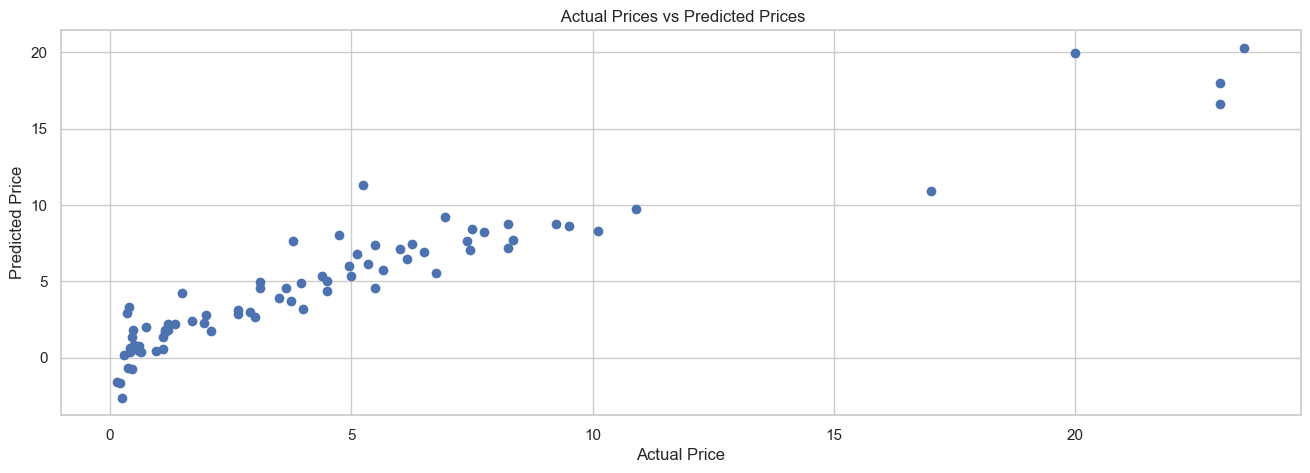

In [63]:
plt.scatter(y_test, linear_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(random_state=0)

tree.fit(X_train,y_train)

tree_pred=tree.predict(X_test)

In [65]:
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')

print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 96.04
The Train_accuracy: 100.00


In [66]:
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error DecisionTreeRegressor {:.4f}".format(rmse))
print("R2_score DecisionTreeRegressor {:4f}".format(r2_score(y_test,tree_pred)))
print("mean_absolute_error DecisionTreeRegressor {:4f}".format(mean_absolute_error(y_test,tree_pred)))

Root_mean_squred_error DecisionTreeRegressor 1.0429
R2_score DecisionTreeRegressor 0.960416
mean_absolute_error DecisionTreeRegressor 0.641053


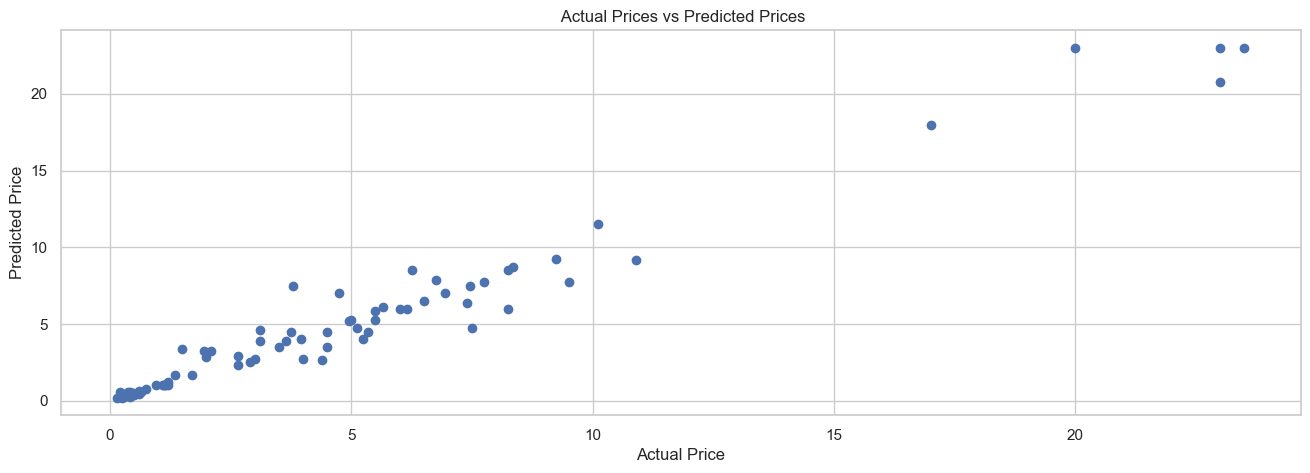

In [67]:
plt.scatter(y_test, tree_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor

random=RandomForestRegressor()

random.fit(X_train,y_train)

random_pred=random.predict(X_test)

In [69]:
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')

print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 97.04
The Train_accuracy: 98.03


In [70]:

mse=mean_squared_error(y_test,random_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error RandomForestRegressor {:.4f}".format(rmse))
print("R2_score RandomForestRegressor {:4f}".format(r2_score(y_test,random_pred)))
print("mean_absolute_error RandomForestRegressor {:4f}".format(mean_absolute_error(y_test,random_pred)))

Root_mean_squred_error RandomForestRegressor 0.9020
R2_score RandomForestRegressor 0.970388
mean_absolute_error RandomForestRegressor 0.568317


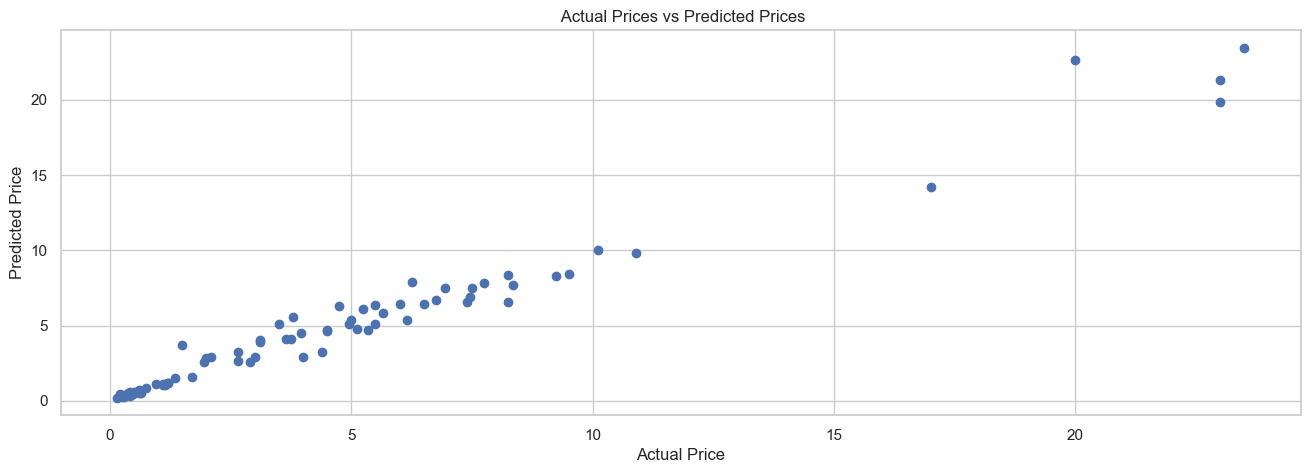

In [71]:
plt.scatter(y_test, random_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor()

xgb.fit(X_train,y_train)

xgb_pred=xgb.predict(X_test)

In [80]:
print(f'The Test_accuracy: {xgb.score(X_test,y_test)*100:.2f}')

print(f'The Train_accuracy: {xgb.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 97.25
The Train_accuracy: 100.00


In [81]:
mse=mean_squared_error(y_test,xgb_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error XGBRegressor {:.4f}".format(rmse))
print("R2_score XGBRegressor {:4f}".format(r2_score(y_test,xgb_pred)))
print("mean_absolute_error XGBRegressor {:4f}".format(mean_absolute_error(y_test,xgb_pred)))

Root_mean_squred_error XGBRegressor 0.8698
R2_score XGBRegressor 0.972461
mean_absolute_error XGBRegressor 0.529474


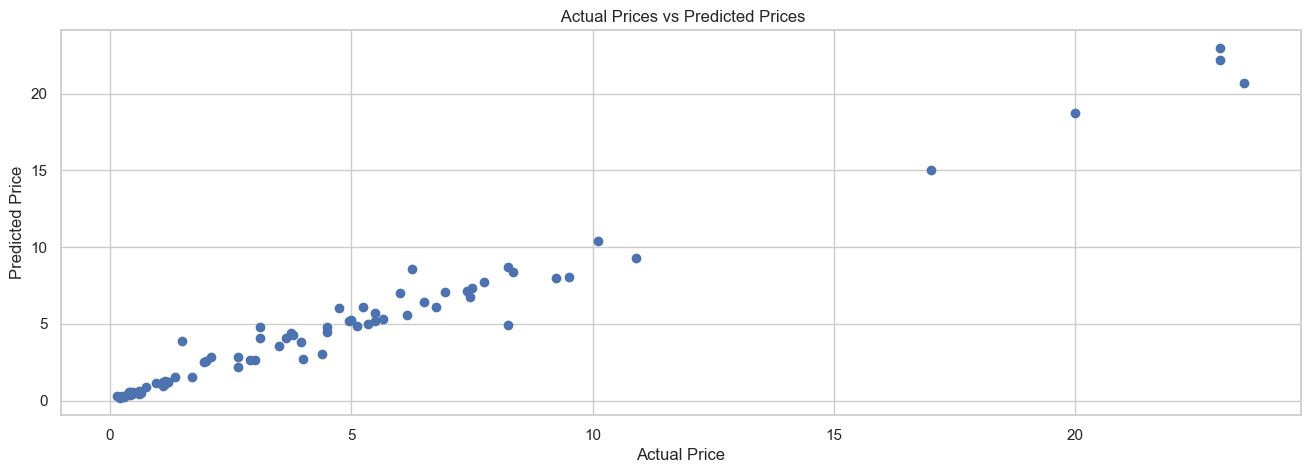

In [82]:
plt.scatter(y_test, xgb_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# #EMail Spam Detection

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [87]:
df= pd.read_csv("C:/Users/Vaidhehi/OneDrive/Documents/spam.csv",encoding='ISO-8859-1')
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [88]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [89]:
df.columns = ['label', 'message']

In [90]:
df.shape

(5572, 2)

In [91]:
df=df.drop_duplicates()
df

label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5169 rows x 2 columns]

In [92]:
df.shape

(5169, 2)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [94]:
df.describe()

label                                            message
count   5169                                               5169
unique     2                                               5169
top      ham  Go until jurong point, crazy.. Available only ...
freq    4516                                                  1

In [95]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

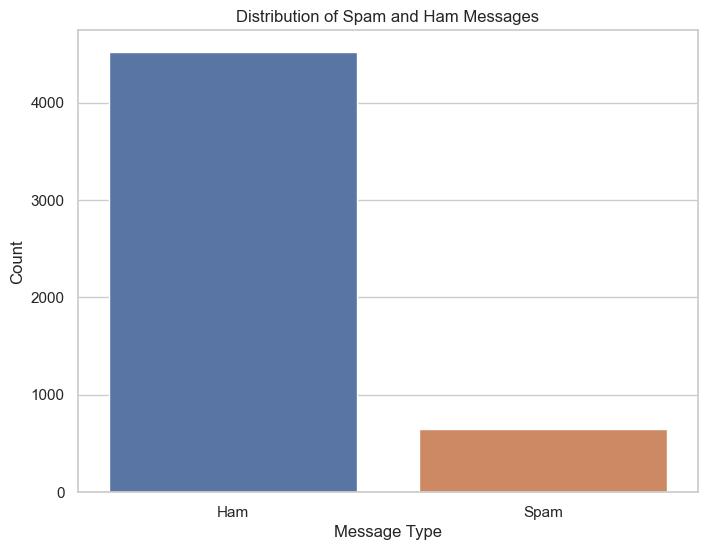

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

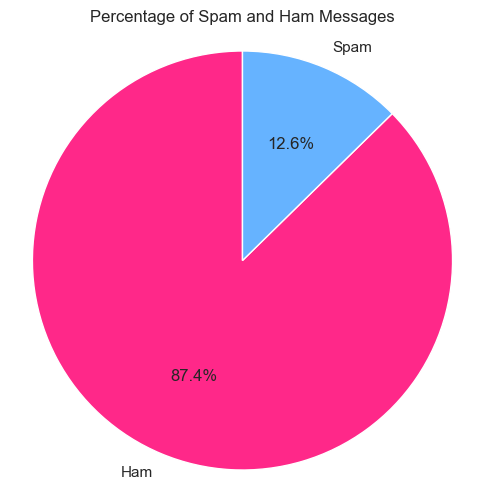

In [97]:
spam_count = df['label'].value_counts()[1]
ham_count = df['label'].value_counts()[0]
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [98]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaidhehi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [99]:
def preprocess_text(text):
    
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    text = text.lower()
    
    words = text.split()
    
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    cleaned_text = ' '.join(words)
    return cleaned_text

In [100]:
df_1 = df.copy()

df_1['message'] = df_1['message'].apply(lambda x: preprocess_text(x))

In [101]:
df_1['label'] = df_1['label'].map({'ham': 0, 'spam': 1})

In [102]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [103]:
X = df_1['message']  
y = df_1['label']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [106]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [107]:
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [109]:
accuracy*100


97.09864603481626

In [110]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[889   0]
 [ 30 115]]


In [111]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [112]:
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]


input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)


prediction = clf.predict(input_tfidf)


if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"


print(f"Prediction: {result}")

Prediction: Ham


In [113]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]


input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)


prediction = clf.predict(input_tfidf)


if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"


print(f"Prediction: {result}")

Prediction: Spam


In [115]:
pip install pandas matplotlib wordcloud


     ------------------------------------ 153.3/153.3 kB 656.2 kB/s eta 0:00:00


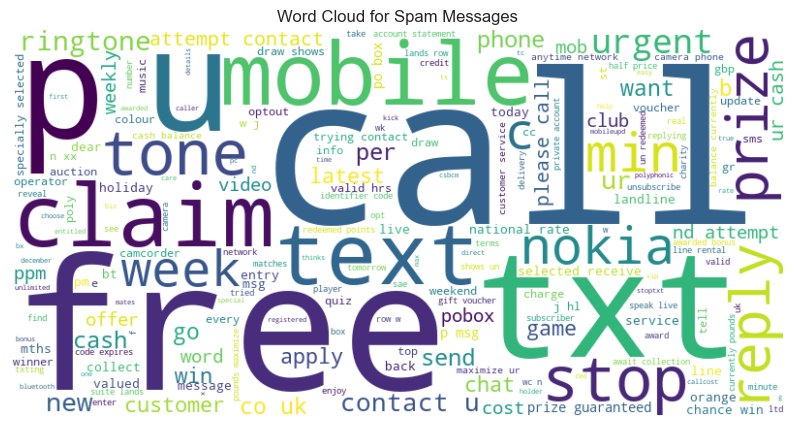

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df_results = pd.DataFrame({'message': X_test, 'label': y_pred})

spam_messages = df_results[df_results['label'] == 1]['message']


spam_text = " ".join(spam_messages)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Messages")
plt.show()

In [117]:
word_freq = WordCloud().process_text(spam_text)


sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

for word, frequency in sorted_word_freq:
    print(f'{word}: {frequency}')

call: 60
free: 44
txt: 28
p: 27
u: 26
mobile: 22
claim: 22
text: 21
stop: 21
tone: 21


# Sales Prediction

In [118]:
import pandas as pd

In [119]:
df = pd.read_csv("C:/Users/Vaidhehi/OneDrive/Documents/Advertising.csv")
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [120]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [121]:
df.shape

(200, 4)

In [122]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [124]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [125]:
df.drop_duplicates(inplace=True)

In [126]:
df.shape

(200, 4)

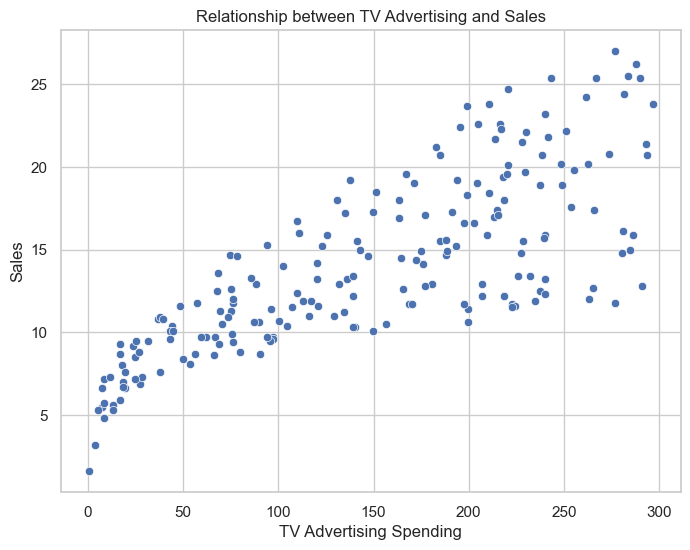

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.show()

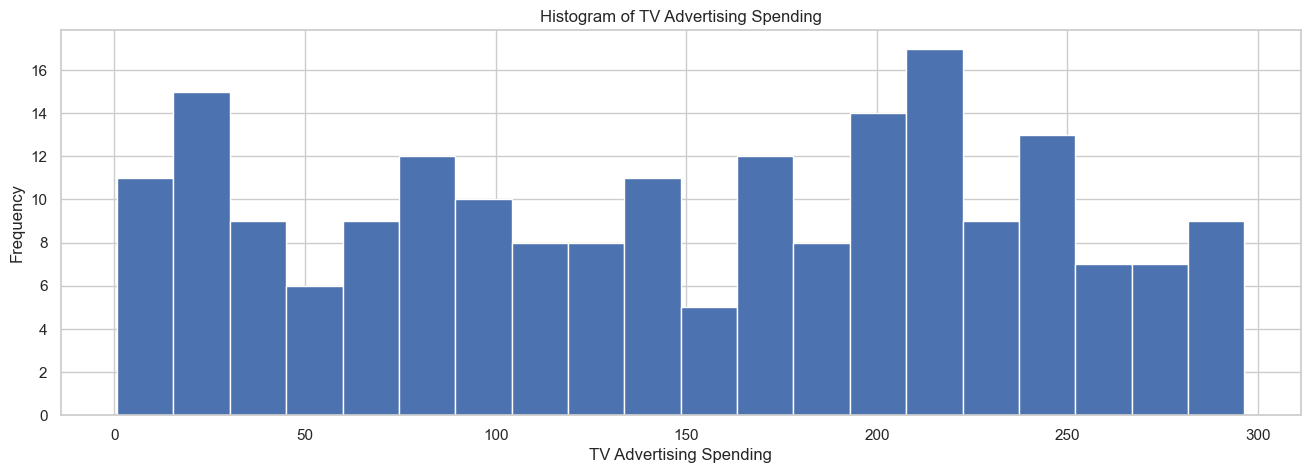

In [128]:
plt.hist(df['TV'], bins=20)
plt.xlabel('TV Advertising Spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV Advertising Spending')
plt.show()


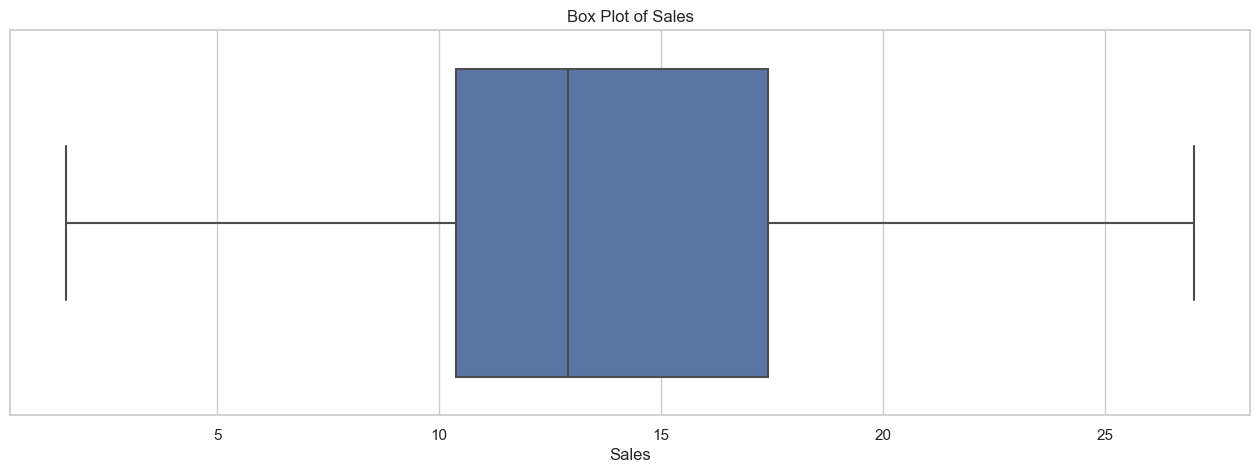

In [129]:
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

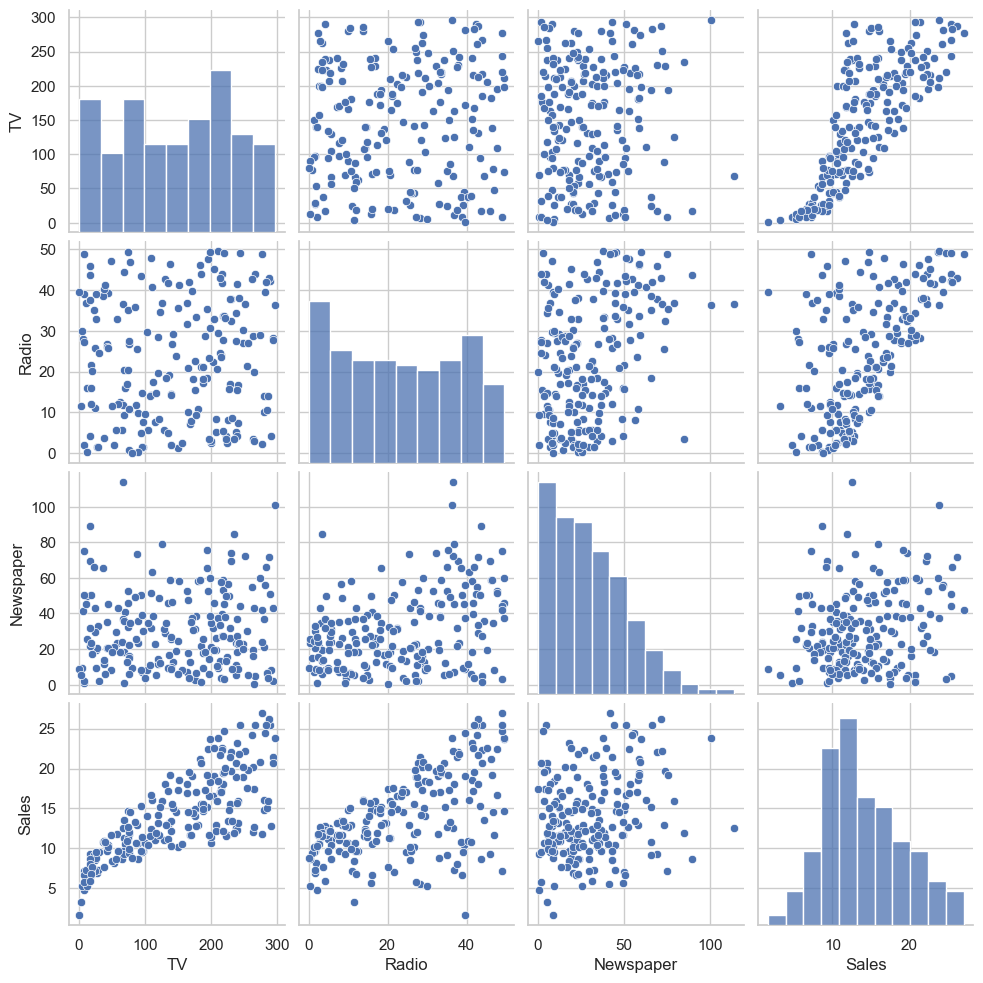

In [130]:
sns.pairplot(df)
plt.show()

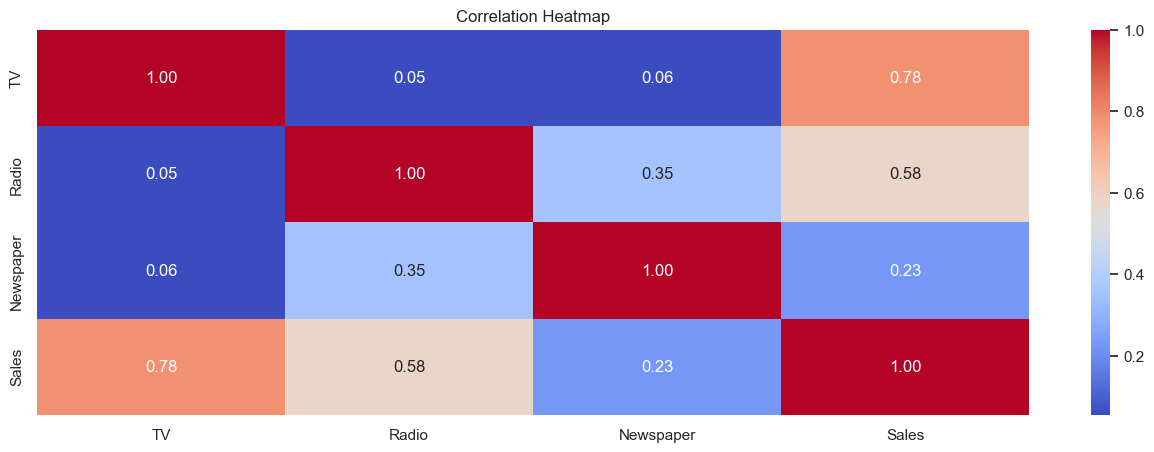

In [131]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [132]:
df['Total_Advertising_Spending'] = df['TV'] + df['Radio'] + df['Newspaper']

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TV                          200 non-null    float64
 1   Radio                       200 non-null    float64
 2   Newspaper                   200 non-null    float64
 3   Sales                       200 non-null    float64
 4   Total_Advertising_Spending  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [134]:
df.head()

TV  Radio  Newspaper  Sales  Total_Advertising_Spending
0  230.1   37.8       69.2   22.1                       337.1
1   44.5   39.3       45.1   10.4                       128.9
2   17.2   45.9       69.3    9.3                       132.4
3  151.5   41.3       58.5   18.5                       251.3
4  180.8   10.8       58.4   12.9                       250.0

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976104
R-squared: 0.899438024100912


In [139]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

y_pred = model_tree.predict(X_test)

In [140]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5800000000000007
R-squared: 0.9499423287311826


In [141]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

y_pred = model_forest.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2455171750000056
R-squared: 0.9605394371482174


In [143]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

In [144]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8866993355895187
R-squared: 0.9719075292055577


In [145]:
from sklearn.svm import SVR

model_svm = SVR(kernel='linear')  
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

In [146]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6034511463941614
R-squared: 0.8858352070130112


In [147]:
import random
random.seed(42)  
sample_data = df[['TV', 'Radio', 'Newspaper']].sample(5)

In [148]:
sample_data

TV  Radio  Newspaper
166   17.9   37.6       21.6
70   199.1   30.6       38.7
197  177.0    9.3        6.4
59   210.7   29.5        9.3
15   195.4   47.7       52.9

In [149]:
sample_data['Total_Advertising_Spending'] = sample_data['TV'] + sample_data['Radio'] + sample_data['Newspaper']

In [150]:
sample_data

TV  Radio  Newspaper  Total_Advertising_Spending
166   17.9   37.6       21.6                        77.1
70   199.1   30.6       38.7                       268.4
197  177.0    9.3        6.4                       192.7
59   210.7   29.5        9.3                       249.5
15   195.4   47.7       52.9                       296.0

In [151]:
linear_predictions = model_linear.predict(sample_data)
tree_predictions = model_tree.predict(sample_data)
forest_predictions = model_forest.predict(sample_data)
gb_predictions = model_gb.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)

In [152]:
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions
})

In [153]:

predictions_table

Original Value  Linear Regression Prediction  Decision Tree Prediction  \
166             8.0                     10.953100                       8.0   
70             18.3                     17.780938                      18.3   
197            12.8                     12.673377                      12.8   
59             18.4                     18.010509                      18.4   
15             22.4                     20.889882                      22.6   

     Random Forest Prediction  Gradient Boosting Prediction  SVM Prediction  
166                     7.788                      7.953065       11.776046  
70                     18.361                     18.142276       18.048466  
197                    12.865                     12.787212       12.830986  
59                     18.441                     18.681061       18.342544  
15                     21.558                     22.372171       21.335244

In [154]:
# Initialize a Git repository in your project folder
git init

# Add your Jupyter project files to the repository
git add .

# Commit the changes
git commit -m "Initial commit"

# Add the GitHub repository as a remote
git remote add origin https://github.com/vaidehi/your-repo-name.git

# Push your project to GitHub
git push -u origin master

SyntaxError: invalid syntax (3576936553.py, line 2)